# Chapter 2: Building Abstractions with Data

## 2.1 Introduction
### 2.1.1 Native Data Types
Python includes three native numeric types: integers (int), real numbers (float), and complex numbers (complex).

In [2]:
print(type(2))
print(type(1.5))
print(type(1+1j))

<class 'int'>
<class 'float'>
<class 'complex'>


## 2.2 Data Abstraction
 The general technique of isolating the parts of a program that deal with how data are represented from the parts that deal with how data are manipulated is a powerful design methodology called data abstraction. Data abstraction makes programs much easier to design, maintain, and modify.

Data abstraction is similar in character to functional abstraction. When we create a functional abstraction, the details of how a function is implemented can be suppressed, and the particular function itself can be replaced by any other function with the same overall behavior. In other words, we can make an abstraction that separates the way the function is used from the details of how the function is implemented. Analogously, data abstraction isolates how a compound data value is used from the details of how it is constructed.

### 2.2.1 Example: Rational Numbers
We are using here a powerful strategy for designing programs: *wishful thinking*. We haven't yet said how a rational number is represented, or how the functions numer, denom, and rational should be implemented. Even so, if we did define these three functions, we could then add, multiply, print, and test equality of rational numbers:

Now we have the operations on rational numbers defined in terms of the selector functions *numer* and *denom*, and the constructor function *rational*, but we haven't yet defined these functions. What we need is some way to glue together a numerator and a denominator into a compound value.

In [3]:
def add_rationals(x, y):
    nx, dx = numer(x), denom(x)
    ny, dy = numer(y), denom(y)
    return rational(nx * dy + ny * dx, dx * dy)
def mul_rationals(x, y):
    return rational(numer(x) * numer(y), denom(x) * denom(y))
def print_rational(x):
    print(numer(x), '/', denom(x))
def rationals_are_equal(x, y):
    return numer(x) * denom(y) == numer(y) * denom(x)

### 2.2.2 Pairs
To enable us to implement the concrete level of our data abstraction, Python provides a compound structure called a **list**, which can be constructed by placing expressions within square brackets separated by commas. Such an expression is called a list literal.

In [4]:
pair = [10, 20]
x, y = pair
print(x, y)
print(pair[0])
from operator import getitem
getitem(pair, 0)

10 20
10


10

In [5]:
def rational(n, d):
    return [n, d]

def numer(x):
    return x[0]

def denom(x):
    return x[1]

Together with the arithmetic operations we defined earlier, we can manipulate rational numbers with the functions we have defined.

In [6]:
half = rational(1, 2)
print_rational(half)
third = rational(1, 3)
print_rational(mul_rationals(half, third))
print_rational(add_rationals(third, third))

1 / 2
1 / 6
6 / 9


from fractions import gcd
def rational(n, d):
    g = gcd(n, d)
    return (n//g, d//g)

### 2.2.3 Abstraction Barriers
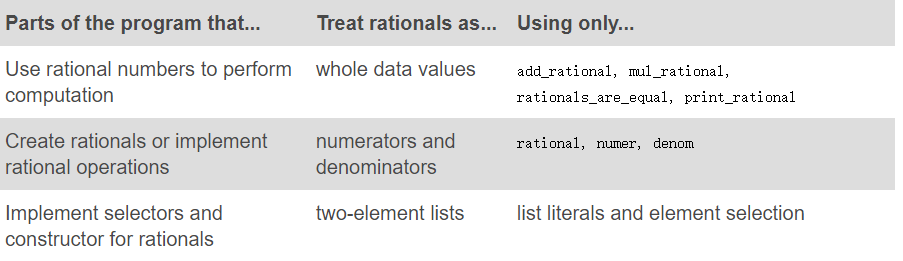
In each layer above, the functions in the final column enforce an abstraction barrier. These functions are called by a higher level and implemented using a lower level of abstraction.

An abstraction barrier violation occurs whenever a part of the program that can use a higher level function instead uses a function in a lower level. For example, a function that computes the square of a rational number is best implemented in terms of mul_rational, which does not assume anything about the implementation of a rational number.

Abstraction barriers make programs easier to maintain and to modify. The fewer functions that depend on a particular representation, the fewer changes are required when one wants to change that representation. All of these implementations of square_rational have the correct behavior, but only the first is robust to future changes. The square_rational function would not require updating even if we altered the representation of rational numbers. By contrast, square_rational_violating_once would need to be changed whenever the selector or constructor signatures changed, and square_rational_violating_twice would require updating whenever the implementation of rational numbers changed.

In [7]:
def square_rational(x):
    return mul_rational(x, x)

def square_rational_violating_once(x):
    return rational(numer(x) * numer(x), denom(x) * denom(x))

def square_rational_violating_twice(x):
    return [x[0] * x[0], x[1] * x[1]]

### 2.2.4 The Properties of Data
In general, we can express abstract data using a collection of selectors and constructors, together with some behavior conditions. As long as the behavior conditions are met (such as the division property above), the selectors and constructors constitute a valid representation of a kind of data. 

The implementation details below an abstraction barrier may change, but if the behavior does not, then the data abstraction remains valid, and any program written using this data abstraction will remain correct.

This point of view can be applied broadly, including to the pair values that we used to implement rational numbers. We never actually said much about what a pair was, only that the language supplied the means to create and manipulate lists with two elements. The behavior we require to implement a pair is that it glues two values together. Stated as a behavior condition,

- If a pair p was constructed from values x and y, then select(p, 0) returns x, and select(p, 1) returns y.

We don't actually need the list type to create pairs. Instead, we can implement two functions pair and select that fulfill this description just as well as a two-element list.

In [8]:
def pair(x, y):
    """Return a function that represents a pair."""
    def get(index):
        if index == 0:
            return x
        elif index == 1:
            return y
    return get

def select(p, i):
    """Return the element at index i of pair p."""
    return p(i)

p = pair(20, 14)
select(p, 0)

20